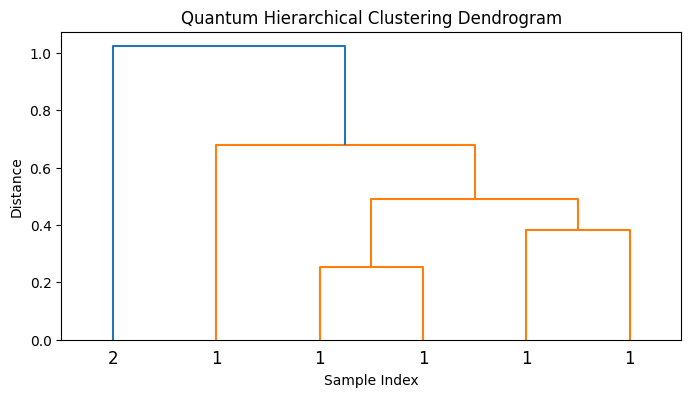

Quantum Similarity Matrix:
 [[0.68007312 0.26217443 0.81342569 0.47470228 0.17900153 0.741821  ]
 [0.30422608 0.01507125 0.60582129 0.07368253 0.10795247 0.41508105]
 [0.98692563 0.52962253 0.94345401 0.84221287 0.30249681 0.9928515 ]
 [0.56815361 0.03328839 0.84488804 0.26049062 0.00305388 0.68170326]
 [0.44084194 0.08732097 0.69183592 0.2087242  0.11626669 0.53805305]
 [0.40866329 0.43101791 0.45491395 0.39709381 0.47383132 0.42273538]]
Cluster Labels: [1 1 2 1 1 1]


In [1]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=6, centers=2, n_features=2, random_state=42)

# Step 2: Define quantum device
dev = qml.device("default.qubit", wires=2)

# Step 3: Quantum embedding circuit
def quantum_embedding(x):
    qml.RY(x[0], wires=0)
    qml.RY(x[1], wires=1)
    qml.CNOT(wires=[0, 1])

# Step 4: Quantum similarity via swap test
@qml.qnode(dev)
def swap_test(x1, x2):
    qml.Hadamard(wires=0)
    quantum_embedding(x1)
    quantum_embedding(x2)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

def quantum_similarity_matrix(X):
    n = len(X)
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sim_matrix[i, j] = swap_test(X[i], X[j])[0]  # Probability of measuring |0⟩
    return sim_matrix

# Step 5: Compute quantum similarity matrix
Q_sim = quantum_similarity_matrix(X)

# Step 6: Convert similarity to distance
Q_dist = 1 - Q_sim

# Step 7: Apply hierarchical clustering
Z = linkage(Q_dist, method='average')
labels = fcluster(Z, t=2, criterion='maxclust')

# Step 8: Visualize dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=labels)
plt.title("Quantum Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 9: Output results
print("Quantum Similarity Matrix:\n", Q_sim)
print("Cluster Labels:", labels)